In [1]:
import fastavro
import pickle
import json
import time
import sys  
import os

In [2]:
# Generate a sample dictionary containing a large amount of data
data = [{'id': i, 'name': f'name_{i}'} for i in range(1, 5000000)]
data[:10]

[{'id': 1, 'name': 'name_1'},
 {'id': 2, 'name': 'name_2'},
 {'id': 3, 'name': 'name_3'},
 {'id': 4, 'name': 'name_4'},
 {'id': 5, 'name': 'name_5'},
 {'id': 6, 'name': 'name_6'},
 {'id': 7, 'name': 'name_7'},
 {'id': 8, 'name': 'name_8'},
 {'id': 9, 'name': 'name_9'},
 {'id': 10, 'name': 'name_10'}]

**Avro** is developed within Apache's Hadoop project and offers:
* Rich data structures.
* Compact, fast, binary data format.
* Container file for persistent data storage.
* JSON-defined Avro schemas.
* Multi-language support.

## Fastavro v.s Json v.s Pickle 

In [3]:
# Write the data to an Avro file
avro_file_path = 'example.avro'
schema = fastavro.parse_schema({
    'type': 'record',
    'name': 'Example',
    'fields': [{'name': 'id', 'type': 'int'}, {'name': 'name', 'type': 'string'}]
})
with open(avro_file_path, 'wb') as avro_file:
    fastavro.writer(avro_file, schema=schema, records=data) # , codec="snappy"

# Write the data to a JSON file
json_file_path = 'example.json'
with open(json_file_path, 'w') as json_file:
    json.dump(data, json_file)

# Write the data to a Pickle file
pickle_file_path = 'example.pkl'
with open(pickle_file_path, 'wb') as pickle_file:
    pickle.dump(data, pickle_file)

    
# Measure reading time
# Use Fastavro to read the Avro file
start_time_avro = time.time()
with open(avro_file_path, 'rb') as avro_file:
    avro_data = list(fastavro.reader(avro_file))
time_avro = time.time() - start_time_avro

# Use Json to read the Pickle file
start_time_json = time.time()
with open('example.json', 'r') as json_file:
    json_data = json.load(json_file)
time_json = time.time() - start_time_json

# Use Pickle to read the Pickle file
start_time_pickle = time.time()
with open(pickle_file_path, 'rb') as pickle_file:
    pickle_data = pickle.load(pickle_file)
time_pickle = time.time() - start_time_pickle

# Measure sizes 
avro_size = sys.getsizeof(open(avro_file_path, 'rb').read()) / (1024 * 1024)  # Convert to MB
json_size = sys.getsizeof(open(json_file_path, 'rb').read()) / (1024 * 1024)  # Convert to MB
pickle_size = sys.getsizeof(open(pickle_file_path, 'rb').read()) / (1024 * 1024)  # Convert to MB

# Output execution time and variable sizes
print('File size: ')
print(f"Fastavro file size: {avro_size} MB")
print(f"JSON file size: {json_size} MB")
print(f"Pickle file size: {pickle_size} MB")
print()
print('Time:')
print(f'Fastavro took {time_avro} seconds to read Avro file.')
print(f'Json took {time_json} seconds to read JSON file.')
print(f'Pickle took {time_pickle} seconds to read Pickle file.')

File size: 
Fastavro file size: 79.09860897064209 MB
JSON file size: 193.38396453857422 MB
Pickle file size: 132.3572645187378 MB

Time:
Fastavro took 2.4596469402313232 seconds to read Avro file.
Json took 1.1699340343475342 seconds to read JSON file.
Pickle took 0.7435681819915771 seconds to read Pickle file.


Text(0, 0.5, 'Time (seconds)')

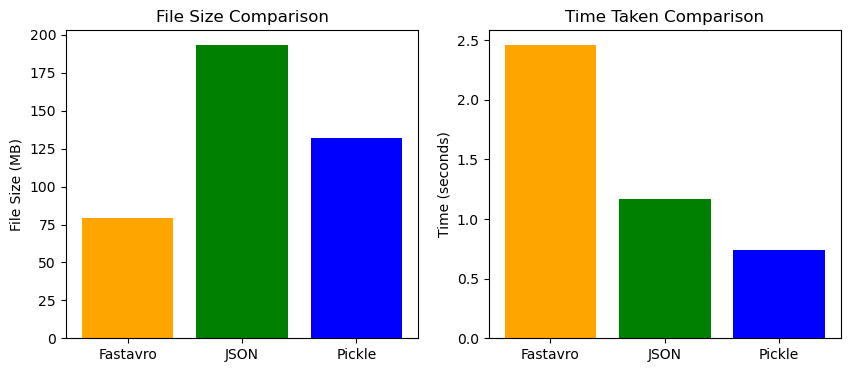

In [4]:
import matplotlib.pyplot as plt

# Create bar plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# File size reduction plot
ax1.bar(['Fastavro', 'JSON', 'Pickle'], [avro_size, json_size, pickle_size], color=['orange', 'green','blue'])
ax1.set_title('File Size Comparison')
ax1.set_ylabel('File Size (MB)')

# Time savings plot
ax2.bar(['Fastavro', 'JSON', 'Pickle'], [time_avro, time_json, time_pickle], color=['orange', 'green','blue'])
ax2.set_title('Time Taken Comparison')
ax2.set_ylabel('Time (seconds)')

File size: 
Fastavro: 79.09860897064209 MB
JSON: 193.38396453857422 MB
Pickle: 132.3572645187378 MB

Time:
Fastavro: 2.3260791301727295 secs
JSON: 1.2428178787231445 secs
Pickle: 0.9143626689910889 secs